In [46]:

import time
import matplotlib.pyplot as plt
import numpy as np
from qutip import (Options,Qobj,about, destroy, expect, num, propagator,
                   propagator_steadystate,basis, sigmax, sigmaz,mesolve)

In [79]:

def qubit_integrate(omiga,delta, psi0, tlist):

    # Hamiltonian
    sx = sigmax()
    sz = sigmaz()
    sm = destroy(2)

    H0 = -omiga / 2.0 * sx 
    H1 = - delta * sz

    # collapse operators
    c_op_list = np.sqrt(800) *sz

    H = [H0, H1]
    output = mesolve(H, psi0, tlist, c_op_list, [sm.dag() * sm], {})

    return output.expect[0]
    

[0.         0.02799858 0.05844012 ... 0.5        0.5        0.5       ]
[0.         0.0280203  0.05849691 ... 0.5        0.5        0.5       ]
[0.         0.02804193 0.0585535  ... 0.5        0.5        0.5       ]
[0.         0.02806348 0.05860991 ... 0.5        0.5        0.5       ]
[0.         0.02808493 0.05866613 ... 0.5        0.5        0.5       ]
[0.         0.0281063  0.05872215 ... 0.5        0.5        0.5       ]
[0.         0.02812759 0.05877798 ... 0.5        0.5        0.5       ]
[0.         0.02814878 0.05883361 ... 0.5        0.5        0.5       ]
[0.         0.02816989 0.05888904 ... 0.5        0.5        0.5       ]
[0.         0.02819091 0.05894428 ... 0.5        0.5        0.5       ]
[0.         0.02821184 0.05899932 ... 0.5        0.5        0.5       ]
[0.         0.02823268 0.05905415 ... 0.5        0.5        0.5       ]
[0.         0.02825343 0.05910878 ... 0.5        0.5        0.5       ]
[0.         0.02827409 0.05916321 ... 0.5        0.5        0.5 

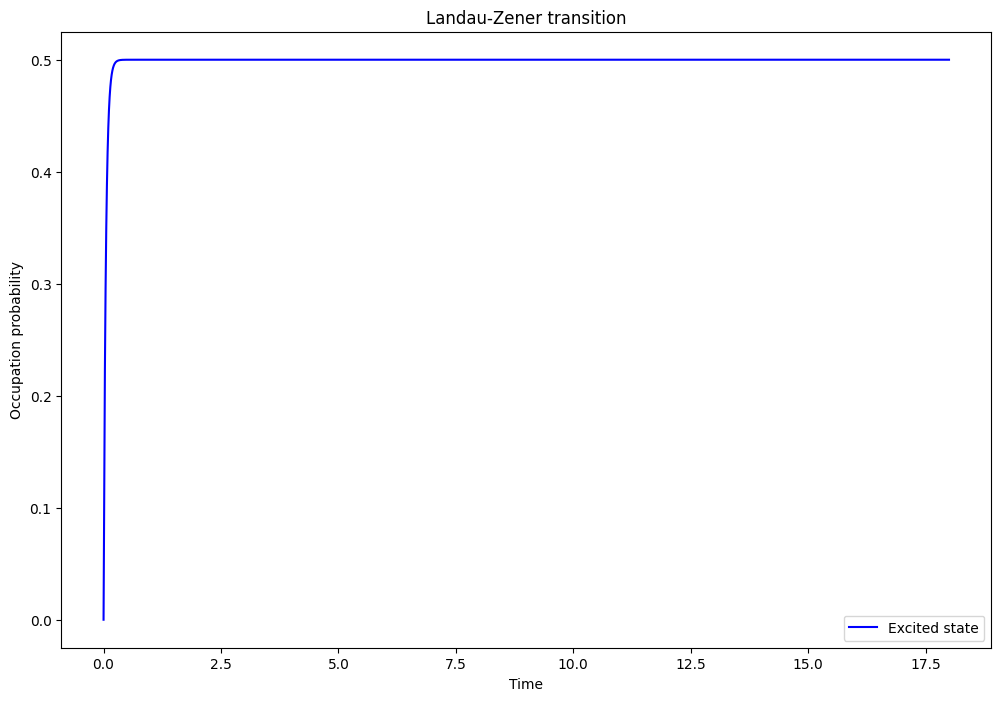

In [81]:
omiga = 29 * 2 * np.pi  # qubit sigma_x coefficient

delta_value=np.linspace(-290.0, 10, 200) # qubit sigma_z coefficient

psi0 = basis(2, 0)  # initial state

tlist = np.linspace(0, 18, 5000)



for delta in delta_value:
 
 p_ex = qubit_integrate(omiga,delta, psi0, tlist)

 print(p_ex)

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(tlist, np.real(p_ex), "b")
ax.set_xlabel("Time")
ax.set_ylabel("Occupation probability")
ax.set_title("Landau-Zener transition")
ax.legend(("Excited state", "Ground state", "Landau-Zener formula"), loc=0);